***Cleaning*** Steps
1. Clean *Salary* Column
                   - Create min-salary, max-salary, avg-salary
2. Clean Job Title
3. Clean Company Name
4. Extract State From Location
5. Create Company Age
6. Handle missing/invalid values
7. Create seniority Column
8. Crete skill Columns From Job Description
9. Remove Un-necessary Columns

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

Load Data Set

In [2]:
df = pd.read_csv("Uncleaned_DS_jobs.csv")

In [3]:
df.head(5)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\r\n\r\nThe Senior Data Scientist i...,3.1,Healthfirst\r\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\r\n\r\nJ...",4.2,ManTech\r\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\r\n\r\n\r\nAnalysis Group is one of t...,3.8,Analysis Group\r\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\r\n\r\nDo you have a passion ...,3.5,INFICON\r\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


1. Clean *Salary* Column
                   - Create min-salary, max-salary, avg-salary

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isnull().sum()

index                0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [7]:
df["Salary Estimate"].head(10)

0    $137K-$171K (Glassdoor est.)
1    $137K-$171K (Glassdoor est.)
2    $137K-$171K (Glassdoor est.)
3    $137K-$171K (Glassdoor est.)
4    $137K-$171K (Glassdoor est.)
5    $137K-$171K (Glassdoor est.)
6    $137K-$171K (Glassdoor est.)
7    $137K-$171K (Glassdoor est.)
8    $137K-$171K (Glassdoor est.)
9    $137K-$171K (Glassdoor est.)
Name: Salary Estimate, dtype: object

In [8]:
df = df[df['Salary Estimate'] != '-1']

In [9]:
df["Salary Estimate"].tail(10)

662    $105K-$167K (Glassdoor est.)
663    $105K-$167K (Glassdoor est.)
664    $105K-$167K (Glassdoor est.)
665    $105K-$167K (Glassdoor est.)
666    $105K-$167K (Glassdoor est.)
667    $105K-$167K (Glassdoor est.)
668    $105K-$167K (Glassdoor est.)
669    $105K-$167K (Glassdoor est.)
670    $105K-$167K (Glassdoor est.)
671    $105K-$167K (Glassdoor est.)
Name: Salary Estimate, dtype: object

In [10]:
df["Salary Estimate"] = df["Salary Estimate"].str.replace('(Glassdoor est.)', '', regex=False)

In [11]:
df["Salary Estimate"] = df["Salary Estimate"].str.replace('(Employer est.)', '', regex=False)

In [12]:
df["Salary Estimate"].head(10)

0    $137K-$171K 
1    $137K-$171K 
2    $137K-$171K 
3    $137K-$171K 
4    $137K-$171K 
5    $137K-$171K 
6    $137K-$171K 
7    $137K-$171K 
8    $137K-$171K 
9    $137K-$171K 
Name: Salary Estimate, dtype: object

In [13]:
df['Salary Estimate'] = df['Salary Estimate'].str.replace('$', '')

In [14]:
df['Salary Estimate'] = df['Salary Estimate'].str.replace('K', '')

In [15]:
df["Salary Estimate"].head(10)

0    137-171 
1    137-171 
2    137-171 
3    137-171 
4    137-171 
5    137-171 
6    137-171 
7    137-171 
8    137-171 
9    137-171 
Name: Salary Estimate, dtype: object

Split min and max salary

In [16]:
df[['min_salary', 'max_salary']] = df['Salary Estimate'].str.split('-', expand=True)

In [17]:
df['min_salary'] = pd.to_numeric(df['min_salary'], errors='coerce')*1000

In [18]:
df['max_salary'] = pd.to_numeric(df['max_salary'], errors='coerce')*1000

In [19]:
df[["min_salary","max_salary"]].head(10)

,min_salary,max_salary
0,137000,171000
1,137000,171000
2,137000,171000
3,137000,171000
4,137000,171000
5,137000,171000
6,137000,171000
7,137000,171000
8,137000,171000
9,137000,171000


In [20]:
df['avg_salary'] = (df['min_salary'] + df['max_salary']) / 2

In [21]:
df = df.dropna(subset=['min_salary', 'max_salary'])

In [22]:
df["avg_salary"].head(10)

0    154000.0
1    154000.0
2    154000.0
3    154000.0
4    154000.0
5    154000.0
6    154000.0
7    154000.0
8    154000.0
9    154000.0
Name: avg_salary, dtype: float64

In [23]:
df.head(10)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary,avg_salary
0,0,Sr Data Scientist,137-171,Description\r\n\r\nThe Senior Data Scientist i...,3.1,Healthfirst\r\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",137000,171000,154000.0
1,1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\r\n\r\nJ...",4.2,ManTech\r\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,137000,171000,154000.0
2,2,Data Scientist,137-171,Overview\r\n\r\n\r\nAnalysis Group is one of t...,3.8,Analysis Group\r\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,137000,171000,154000.0
3,3,Data Scientist,137-171,JOB DESCRIPTION:\r\n\r\nDo you have a passion ...,3.5,INFICON\r\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137000,171000,154000.0
4,4,Data Scientist,137-171,Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",137000,171000,154000.0
5,5,Data Scientist,137-171,About Us:\r\n\r\nHeadquartered in beautiful Sa...,4.2,HG Insights\r\n4.2,"Santa Barbara, CA","Santa Barbara, CA",51 to 200 employees,2010,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,-1,137000,171000,154000.0
6,6,Data Scientist / Machine Learning Expert,137-171,Posting Title\r\nData Scientist / Machine Lear...,3.9,Novartis\r\n3.9,"Cambridge, MA","Basel, Switzerland",10000+ employees,1996,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),-1,137000,171000,154000.0
7,7,Data Scientist,137-171,Introduction\r\n\r\nHave you always wanted to ...,3.5,iRobot\r\n3.5,"Bedford, MA","Bedford, MA",1001 to 5000 employees,1990,Company - Public,Consumer Electronics & Appliances Stores,Retail,$1 to $2 billion (USD),-1,137000,171000,154000.0
8,8,Staff Data Scientist - Analytics,137-171,Intuit is seeking a Staff Data Scientist to co...,4.4,Intuit - Data\r\n4.4,"San Diego, CA","Mountain View, CA",5001 to 10000 employees,1983,Company - Public,Computer Hardware & Software,Information Technology,$2 to $5 billion (USD),"Square, PayPal, H&R Block",137000,171000,154000.0
9,9,Data Scientist,137-171,Ready to write the best chapter of your career...,3.6,XSELL Technologies\r\n3.6,"Chicago, IL","Chicago, IL",51 to 200 employees,2014,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1,137000,171000,154000.0


Salary Estimate column will be Dropped.
Dropped because salary values were converted into structured numeric columns, making the original text column redundant.

In [24]:
df.drop('Salary Estimate', axis=1, inplace=True)

In [25]:
df.head(10)

,index,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary,avg_salary
0,0,Sr Data Scientist,Description\r\n\r\nThe Senior Data Scientist i...,3.1,Healthfirst\r\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",137000,171000,154000.0
1,1,Data Scientist,"Secure our Nation, Ignite your Future\r\n\r\nJ...",4.2,ManTech\r\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,137000,171000,154000.0
2,2,Data Scientist,Overview\r\n\r\n\r\nAnalysis Group is one of t...,3.8,Analysis Group\r\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,137000,171000,154000.0
3,3,Data Scientist,JOB DESCRIPTION:\r\n\r\nDo you have a passion ...,3.5,INFICON\r\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137000,171000,154000.0
4,4,Data Scientist,Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",137000,171000,154000.0
5,5,Data Scientist,About Us:\r\n\r\nHeadquartered in beautiful Sa...,4.2,HG Insights\r\n4.2,"Santa Barbara, CA","Santa Barbara, CA",51 to 200 employees,2010,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,-1,137000,171000,154000.0
6,6,Data Scientist / Machine Learning Expert,Posting Title\r\nData Scientist / Machine Lear...,3.9,Novartis\r\n3.9,"Cambridge, MA","Basel, Switzerland",10000+ employees,1996,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),-1,137000,171000,154000.0
7,7,Data Scientist,Introduction\r\n\r\nHave you always wanted to ...,3.5,iRobot\r\n3.5,"Bedford, MA","Bedford, MA",1001 to 5000 employees,1990,Company - Public,Consumer Electronics & Appliances Stores,Retail,$1 to $2 billion (USD),-1,137000,171000,154000.0
8,8,Staff Data Scientist - Analytics,Intuit is seeking a Staff Data Scientist to co...,4.4,Intuit - Data\r\n4.4,"San Diego, CA","Mountain View, CA",5001 to 10000 employees,1983,Company - Public,Computer Hardware & Software,Information Technology,$2 to $5 billion (USD),"Square, PayPal, H&R Block",137000,171000,154000.0
9,9,Data Scientist,Ready to write the best chapter of your career...,3.6,XSELL Technologies\r\n3.6,"Chicago, IL","Chicago, IL",51 to 200 employees,2014,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1,137000,171000,154000.0


2. Clean Job Title

In [26]:
def simplify_title(title):
    title = title.lower()
    
    if 'data scientist' in title:
        return 'Data Scientist'
    elif 'data engineer' in title:
        return 'Data Engineer'
    elif 'data analyst' in title:
        return 'Data Analyst'
    elif 'machine learning' in title:
        return 'ML Engineer'
    else:
        return 'Other'

df['job_simp'] = df['Job Title'].apply(simplify_title)

In [27]:
df['seniority'] = df['Job Title'].apply(
    lambda x: 1 if 'senior' in x.lower() else 0
)

In [28]:
df.head()

,index,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary,avg_salary,job_simp,seniority
0,0,Sr Data Scientist,Description\r\n\r\nThe Senior Data Scientist i...,3.1,Healthfirst\r\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",137000,171000,154000.0,Data Scientist,0
1,1,Data Scientist,"Secure our Nation, Ignite your Future\r\n\r\nJ...",4.2,ManTech\r\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,137000,171000,154000.0,Data Scientist,0
2,2,Data Scientist,Overview\r\n\r\n\r\nAnalysis Group is one of t...,3.8,Analysis Group\r\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,137000,171000,154000.0,Data Scientist,0
3,3,Data Scientist,JOB DESCRIPTION:\r\n\r\nDo you have a passion ...,3.5,INFICON\r\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137000,171000,154000.0,Data Scientist,0
4,4,Data Scientist,Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",137000,171000,154000.0,Data Scientist,0


Average Salary by Job Type

In [29]:
job_salary = df.groupby('job_simp')['avg_salary'].mean().reset_index()
job_salary

,job_simp,avg_salary
0,Data Analyst,117787.234043
1,Data Engineer,113808.510638
2,Data Scientist,125216.483516
3,ML Engineer,117236.111111
4,Other,126701.149425


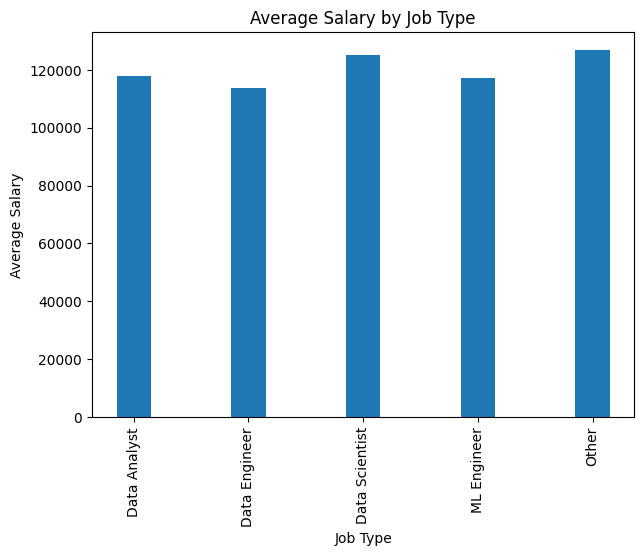

In [30]:
plt.figure(figsize=(7,5))
plt.bar(job_salary['job_simp'], job_salary['avg_salary'], width=0.3)
plt.xticks(rotation=90)
plt.xlabel("Job Type")
plt.ylabel("Average Salary")
plt.title("Average Salary by Job Type")
plt.show()

In [31]:
df.head()

,index,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary,avg_salary,job_simp,seniority
0,0,Sr Data Scientist,Description\r\n\r\nThe Senior Data Scientist i...,3.1,Healthfirst\r\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",137000,171000,154000.0,Data Scientist,0
1,1,Data Scientist,"Secure our Nation, Ignite your Future\r\n\r\nJ...",4.2,ManTech\r\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,137000,171000,154000.0,Data Scientist,0
2,2,Data Scientist,Overview\r\n\r\n\r\nAnalysis Group is one of t...,3.8,Analysis Group\r\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,137000,171000,154000.0,Data Scientist,0
3,3,Data Scientist,JOB DESCRIPTION:\r\n\r\nDo you have a passion ...,3.5,INFICON\r\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137000,171000,154000.0,Data Scientist,0
4,4,Data Scientist,Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",137000,171000,154000.0,Data Scientist,0


3. Clean Company Name

In [32]:
df['Company Name'].unique()

array(['Healthfirst\r\n3.1', 'ManTech\r\n4.2', 'Analysis Group\r\n3.8',
       'INFICON\r\n3.5', 'Affinity Solutions\r\n2.9',
       'HG Insights\r\n4.2', 'Novartis\r\n3.9', 'iRobot\r\n3.5',
       'Intuit - Data\r\n4.4', 'XSELL Technologies\r\n3.6',
       'Novetta\r\n4.5', '1904labs\r\n4.7', 'PNNL\r\n3.7',
       'Old World Industries\r\n3.1',
       'Mathematica Policy Research\r\n3.4',
       'Guzman & Griffin Technologies (GGTI)\r\n4.4',
       'Upside Business Travel\r\n4.1', 'Buckman\r\n3.5',
       'Insight Enterprises, Inc.\r\n4.2', 'Tower Health\r\n3.5',
       'Triplebyte\r\n3.2', 'PulsePoint\r\n4.3', 'Exponent\r\n3.5',
       'Guardian Life\r\n3.5',
       'Spectrum Communications and Consulting\r\n3.4',
       'Oversight Systems\r\n4.7', 'LSQ\r\n4.2',
       'MIT Lincoln Laboratory\r\n3.8', 'Kingfisher Systems\r\n4.5',
       'Formation\r\n2.8', 'Cohere Health\r\n5.0',
       'Acuity Insurance\r\n4.8', 'Chef\r\n3.6',
       'Puget Sound Energy\r\n3.3', 'Sandhills Global\r\

In [33]:
df['Company Name'] = df['Company Name'].apply(lambda x: x.split('\n')[0])

In [34]:
df.rename(columns={'Company Name': 'Company'}, inplace=True)

In [35]:
df['Company'] = df['Company'].str.strip()

In [36]:
df["Company"].head(10)

0           Healthfirst
1               ManTech
2        Analysis Group
3               INFICON
4    Affinity Solutions
5           HG Insights
6              Novartis
7                iRobot
8         Intuit - Data
9    XSELL Technologies
Name: Company, dtype: object

In [37]:
df.head()

,index,Job Title,Job Description,Rating,Company,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary,avg_salary,job_simp,seniority
0,0,Sr Data Scientist,Description\r\n\r\nThe Senior Data Scientist i...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",137000,171000,154000.0,Data Scientist,0
1,1,Data Scientist,"Secure our Nation, Ignite your Future\r\n\r\nJ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,137000,171000,154000.0,Data Scientist,0
2,2,Data Scientist,Overview\r\n\r\n\r\nAnalysis Group is one of t...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,137000,171000,154000.0,Data Scientist,0
3,3,Data Scientist,JOB DESCRIPTION:\r\n\r\nDo you have a passion ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137000,171000,154000.0,Data Scientist,0
4,4,Data Scientist,Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",137000,171000,154000.0,Data Scientist,0


In [39]:
df['job_state'] = df['Location'].apply(lambda x: x.split(',')[1] if ',' in x else x)

In [40]:
df['job_state'] = df['job_state'].str.strip()

In [41]:
df.head()

,index,Job Title,Job Description,Rating,Company,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary,avg_salary,job_simp,seniority,job_state
0,0,Sr Data Scientist,Description\r\n\r\nThe Senior Data Scientist i...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",137000,171000,154000.0,Data Scientist,0,NY
1,1,Data Scientist,"Secure our Nation, Ignite your Future\r\n\r\nJ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,137000,171000,154000.0,Data Scientist,0,VA
2,2,Data Scientist,Overview\r\n\r\n\r\nAnalysis Group is one of t...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,137000,171000,154000.0,Data Scientist,0,MA
3,3,Data Scientist,JOB DESCRIPTION:\r\n\r\nDo you have a passion ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137000,171000,154000.0,Data Scientist,0,MA
4,4,Data Scientist,Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",137000,171000,154000.0,Data Scientist,0,NY


In [42]:
df['hq_state'] = df['Headquarters'].apply(lambda x: x.split(',')[1] if ',' in x else x)
df['hq_state'] = df['hq_state'].str.strip()

In [43]:
df['same_state'] = (df['job_state'] == df['hq_state']).astype(int)

4. Create Company Age

In [45]:
df['Founded'] = pd.to_numeric(df['Founded'], errors='coerce')
df.loc[df['Founded'] < 1, 'Founded'] = np.nan

In [46]:
current_year = 2026
df['company_age'] = current_year - df['Founded']

In [47]:
df.head()

,index,Job Title,Job Description,Rating,Company,Location,Headquarters,Size,Founded,Type of ownership,...,Competitors,min_salary,max_salary,avg_salary,job_simp,seniority,job_state,hq_state,same_state,company_age
0,0,Sr Data Scientist,Description\r\n\r\nThe Senior Data Scientist i...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993.0,Nonprofit Organization,...,"EmblemHealth, UnitedHealth Group, Aetna",137000,171000,154000.0,Data Scientist,0,NY,NY,1,33.0
1,1,Data Scientist,"Secure our Nation, Ignite your Future\r\n\r\nJ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968.0,Company - Public,...,-1,137000,171000,154000.0,Data Scientist,0,VA,VA,1,58.0
2,2,Data Scientist,Overview\r\n\r\n\r\nAnalysis Group is one of t...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981.0,Private Practice / Firm,...,-1,137000,171000,154000.0,Data Scientist,0,MA,MA,1,45.0
3,3,Data Scientist,JOB DESCRIPTION:\r\n\r\nDo you have a passion ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000.0,Company - Public,...,"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137000,171000,154000.0,Data Scientist,0,MA,Switzerland,0,26.0
4,4,Data Scientist,Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998.0,Company - Private,...,"Commerce Signals, Cardlytics, Yodlee",137000,171000,154000.0,Data Scientist,0,NY,NY,1,28.0


5. Crete skill Columns From Job Description

In [48]:
df['python'] = df['Job Description'].str.contains('python', case=False).astype(int)
df['excel'] = df['Job Description'].str.contains('excel', case=False).astype(int)
df['hadoop'] = df['Job Description'].str.contains('hadoop', case=False).astype(int)
df['spark'] = df['Job Description'].str.contains('spark', case=False).astype(int)
df['aws'] = df['Job Description'].str.contains('aws', case=False).astype(int)
df['tableau'] = df['Job Description'].str.contains('tableau', case=False).astype(int)
df['big_data'] = df['Job Description'].str.contains('big data', case=False).astype(int)

In [49]:
df.head()

,index,Job Title,Job Description,Rating,Company,Location,Headquarters,Size,Founded,Type of ownership,...,hq_state,same_state,company_age,python,excel,hadoop,spark,aws,tableau,big_data
0,0,Sr Data Scientist,Description\r\n\r\nThe Senior Data Scientist i...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993.0,Nonprofit Organization,...,NY,1,33.0,0,0,0,0,1,0,0
1,1,Data Scientist,"Secure our Nation, Ignite your Future\r\n\r\nJ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968.0,Company - Public,...,VA,1,58.0,0,0,1,0,0,0,1
2,2,Data Scientist,Overview\r\n\r\n\r\nAnalysis Group is one of t...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981.0,Private Practice / Firm,...,MA,1,45.0,1,1,0,0,1,0,0
3,3,Data Scientist,JOB DESCRIPTION:\r\n\r\nDo you have a passion ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000.0,Company - Public,...,Switzerland,0,26.0,1,1,0,0,1,0,0
4,4,Data Scientist,Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998.0,Company - Private,...,NY,1,28.0,1,1,0,0,0,0,0


6.Drop Unnecessary Columns

In [51]:
df.drop(['index', 'hq_state', 'Competitors'], axis=1, inplace=True)

In [52]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          672 non-null    object 
 1   Job Description    672 non-null    object 
 2   Rating             672 non-null    float64
 3   Company            672 non-null    object 
 4   Location           672 non-null    object 
 5   Headquarters       672 non-null    object 
 6   Size               672 non-null    object 
 7   Founded            554 non-null    float64
 8   Type of ownership  672 non-null    object 
 9   Industry           672 non-null    object 
 10  Sector             672 non-null    object 
 11  Revenue            672 non-null    object 
 12  min_salary         672 non-null    int64  
 13  max_salary         672 non-null    int64  
 14  avg_salary         672 non-null    float64
 15  job_simp           672 non-null    object 
 16  seniority          672 non

Job Title              0
Job Description        0
Rating                 0
Company                0
Location               0
Headquarters           0
Size                   0
Founded              118
Type of ownership      0
Industry               0
Sector                 0
Revenue                0
min_salary             0
max_salary             0
avg_salary             0
job_simp               0
seniority              0
job_state              0
same_state             0
company_age          118
python                 0
excel                  0
hadoop                 0
spark                  0
aws                    0
tableau                0
big_data               0
dtype: int64

Count Skill Frequency

In [53]:
skills = ['python', 'excel', 'hadoop', 'spark', 'aws', 'tableau', 'big_data']

skill_count = df[skills].sum().sort_values(ascending=False)

skill_count

python      491
excel       296
spark       189
aws         174
hadoop      143
big_data    139
tableau     123
dtype: int64

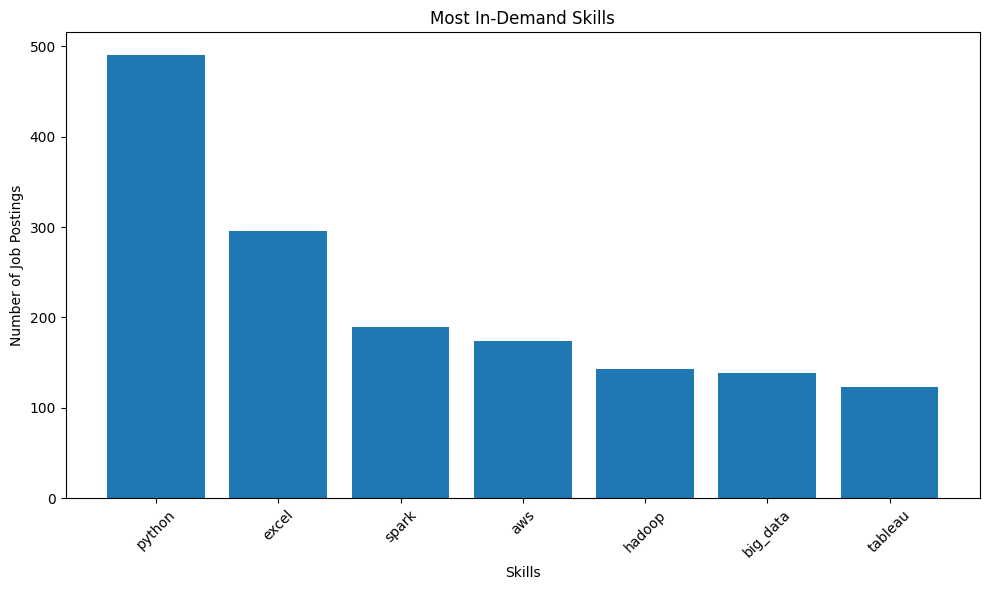

In [54]:
plt.figure(figsize=(10,6))
plt.bar(skill_count.index, skill_count.values)
plt.xticks(rotation=45)
plt.xlabel("Skills")
plt.ylabel("Number of Job Postings")
plt.title("Most In-Demand Skills")
plt.tight_layout()
plt.show()

In [55]:
skills = ['python', 'excel', 'hadoop', 'spark', 'aws', 'tableau', 'big_data']

heatmap_data = df.groupby('job_simp')[skills].mean()
heatmap_data

,python,excel,hadoop,spark,aws,tableau,big_data
job_simp,,,,,,,
Data Analyst,0.510638,0.574468,0.063830,0.106383,0.042553,0.510638,0.063830
Data Engineer,0.808511,0.446809,0.404255,0.446809,0.553191,0.127660,0.361702
Data Scientist,0.804396,0.432967,0.246154,0.318681,0.265934,0.182418,0.239560
ML Engineer,0.722222,0.166667,0.083333,0.138889,0.388889,0.000000,0.083333
Other,0.425287,0.517241,0.068966,0.149425,0.126437,0.114943,0.080460


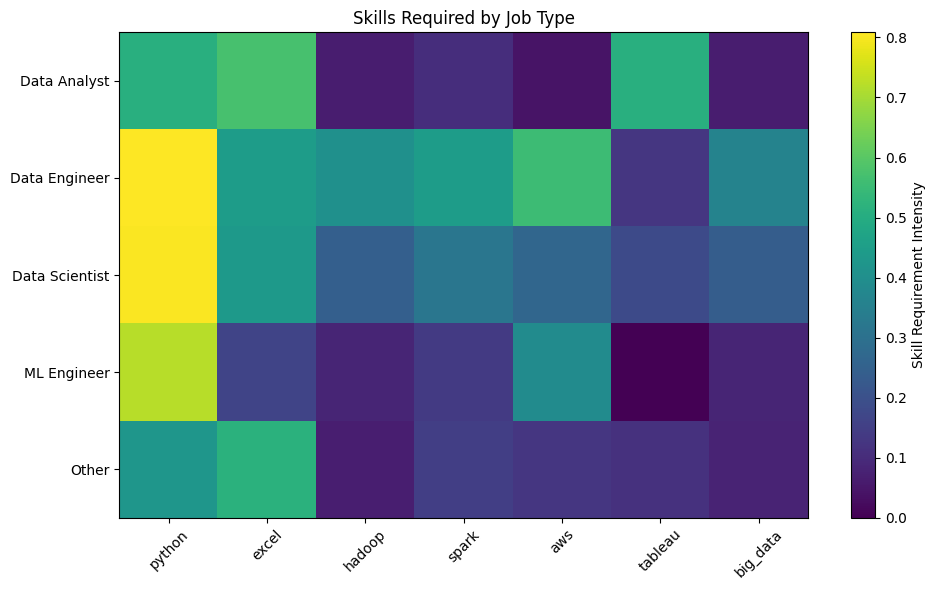

In [56]:
plt.figure(figsize=(10,6))
plt.imshow(heatmap_data, aspect='auto')

plt.xticks(range(len(skills)), skills, rotation=45)
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)

plt.colorbar(label="Skill Requirement Intensity")
plt.title("Skills Required by Job Type")
plt.tight_layout()
plt.show()

In [57]:
skill_count = df[skills].sum()
skill_percent = skill_count / len(df) * 100

skill_summary = pd.DataFrame({
    'Count': skill_count,
    'Percentage (%)': skill_percent
}).sort_values(by='Count', ascending=False)

skill_summary

,Count,Percentage (%)
python,491,73.065476
excel,296,44.047619
spark,189,28.125000
aws,174,25.892857
hadoop,143,21.279762
big_data,139,20.684524
tableau,123,18.303571


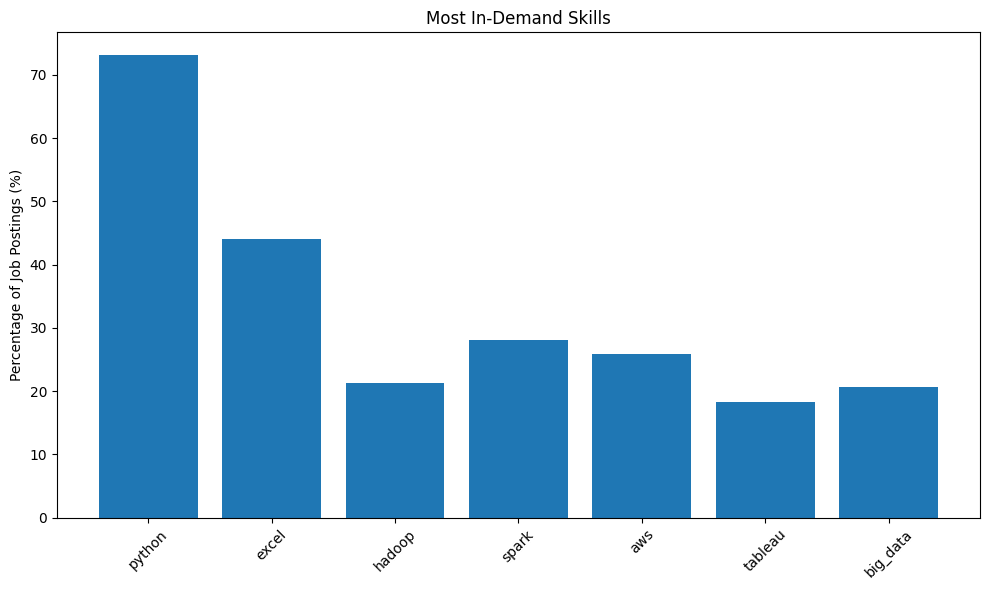

In [58]:
plt.figure(figsize=(10,6))
plt.bar(skill_percent.index, skill_percent.values)
plt.xticks(rotation=45)
plt.ylabel("Percentage of Job Postings (%)")
plt.title("Most In-Demand Skills")
plt.tight_layout()
plt.show()

In [59]:
df.to_csv("cleaned_jobs_data.csv", index=False)

In [60]:
df['Revenue'] = df['Revenue'].str.strip()

In [61]:
df['Revenue'] = df['Revenue'].replace(
    'Unknown / Non-Applicable',
    'Unknown'
)

In [62]:
df['Revenue'].unique()

array(['Unknown', '$1 to $2 billion (USD)', '$100 to $500 million (USD)',
       '$10+ billion (USD)', '$2 to $5 billion (USD)',
       '$500 million to $1 billion (USD)', '$5 to $10 billion (USD)',
       '$10 to $25 million (USD)', '$25 to $50 million (USD)',
       '$50 to $100 million (USD)', '$1 to $5 million (USD)',
       '$5 to $10 million (USD)', 'Less than $1 million (USD)', '-1'],
      dtype=object)

In [63]:
revenue_salary = df.groupby('Revenue')['avg_salary'].mean().sort_values(ascending=False)

revenue_salary

Revenue
$5 to $10 billion (USD)             137187.500000
$500 million to $1 billion (USD)    135473.684211
$5 to $10 million (USD)             131428.571429
-1                                  130796.296296
Unknown                             126492.957746
$2 to $5 billion (USD)              125766.666667
$1 to $2 billion (USD)              125652.777778
$10 to $25 million (USD)            122804.878049
$25 to $50 million (USD)            121930.555556
$100 to $500 million (USD)          121728.723404
$1 to $5 million (USD)              121338.709677
$10+ billion (USD)                  120960.317460
Less than $1 million (USD)          117857.142857
$50 to $100 million (USD)            97870.967742
Name: avg_salary, dtype: float64

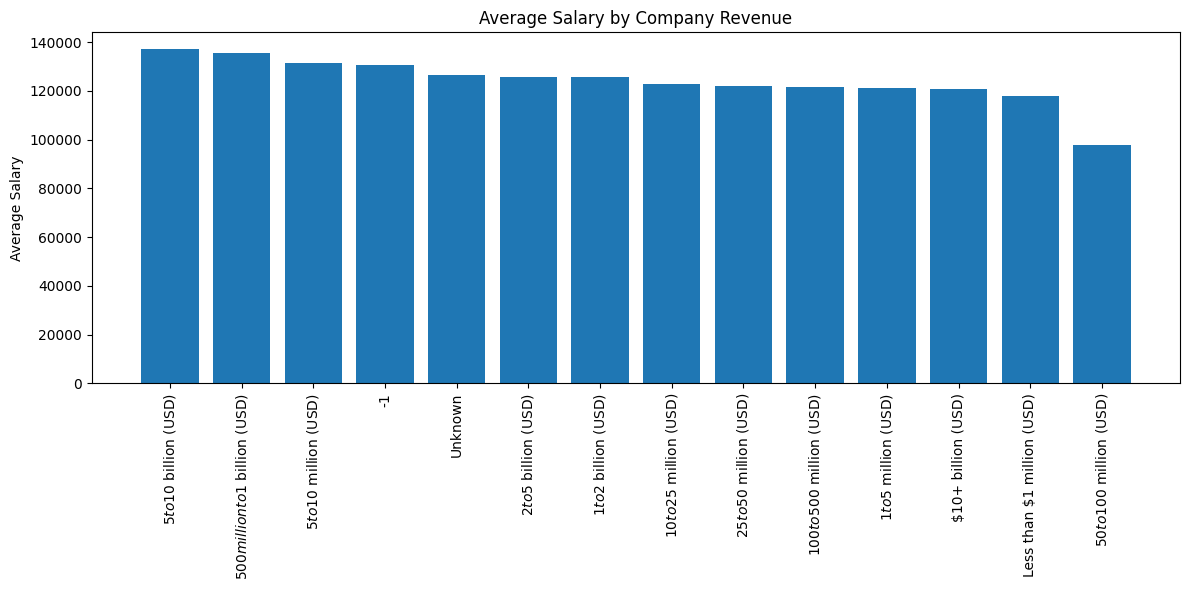

In [64]:
plt.figure(figsize=(12,6))
plt.bar(revenue_salary.index, revenue_salary.values)
plt.xticks(rotation=90)
plt.ylabel("Average Salary")
plt.title("Average Salary by Company Revenue")
plt.tight_layout()
plt.show()

In [67]:
df.to_csv("cleaned_jobs_data.csv", index=False)